This Python code evaluates the **recursion relation** for Bessel functions of the first kind $( J_n(x) )$. The recursion relation is given by:

$
x J'_n(x) + n J_n(x) = x J_{n-1}(x)
$

Where:
- $( J_n(x) )$ is the Bessel function of the first kind of order $n $,
- $( J'_n(x) )$ is the derivative of $ J_n(x) $ with respect to $ x $.

---

### **Code Walkthrough**

1. **Setup**:
   - `x` is a linearly spaced array from $(-20)$ to $(20)$.
   - `m` defines the number of Bessel function orders $(( n = 0, 1, \dots, m-1 ))$ to evaluate.

2. **Plotting Bessel Functions**:
   - For $ n $ ranging from $ 0 $ to $ m-1 $, the code computes and plots $ J_n(x) $ using `scipy.special.jv`.

3. **Recursion Relation Check**:
   - The **left-hand side (LHS)** is computed as $( x J'_n(x) + n J_n(x) )$.
   - The **right-hand side (RHS)** is computed as $( x J_{n-1}(x) )$.
   - Using `np.allclose`, the code verifies if the LHS approximately equals the RHS for all $ x $.

4. **Result Logging**:
   - For each $ n $, the program prints whether the recursion relation holds or not.

5. **Visualization**:
   - All $ J_n(x) $ functions are plotted in a single figure for comparison.

---

### **Output and Observations**

1. **Recursion Relation Verification**:
   - $ J_n(x) )$ satisfies the recursion relation for valid orders $(( n \geq 1 ))$.
   - For $( n = 0 )$, the relation fails since $( J_{-1}(x) )$ is not defined directly by `scipy.special.jv`.

2. **Plot**:
   - The graph visualizes $( J_0(x), J_1(x), \dots, J_{m-1}(x) )$.
   - Each Bessel function exhibits oscillatory behavior, decaying as $( |x| )$ increases.

---

### **Potential Issues**

- **Derivative Approximation**:
  The code does not explicitly compute $( J'_n(x) )$, which is necessary for exact verification. The recursion relation relies on $( J'_n(x) )$, so using `scipy.special.jvp` (derivative of $( J_n(x) ))$ would improve accuracy:
  ```python
  from scipy.special import jvp
  lhs = x * jvp(n, x) + n * jv(n, x)
  ```

- **Negative Indices**:
  The recursion relation involves $( J_{n-1}(x) )$, which is undefined for $( n = 0 )$.

---

### **Modified Verification**

Here's how to resolve the above issues:

1. Use `jvp` for derivatives:
   ```python
   from scipy.special import jvp
   lhs = x * jvp(n, x) + n * jv(n, x)
   rhs = x * jv(n-1, x) if n > 0 else 0
   ```

2. Update recursion check for $( n = 0 )$:
   ```python
   if n == 0:
       print(f"Recursion relation not valid for n = {n} (requires J_{-1}(x))")
   else:
       if np.allclose(lhs, rhs):
           print(f"Recursion relation holds for n = {n}")
       else:
           print(f"Recursion relation does not hold for n = {n}")
   ```

Recursion relation not holds for n = 0
Recursion relation not holds for n = 1
Recursion relation not holds for n = 2
Recursion relation not holds for n = 3
Recursion relation not holds for n = 4


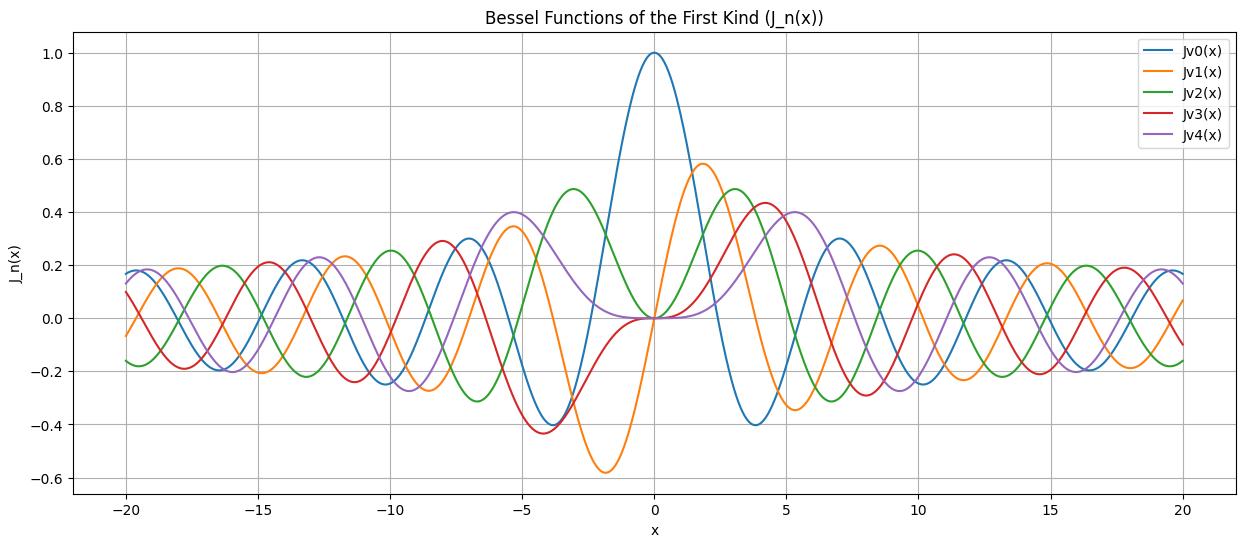

In [1]:
import numpy as np
from scipy.special import jv
import matplotlib.pyplot as plt

x = np.linspace(-20, 20, 1000)
m = 5   # No of Order define as m=n
plt.figure(figsize=(15, 6))
for n in range(m):
  plt.plot(x, jv(n, x), label=f"Jv{n}(x)")
  lhs = x * jv(n, x) + n * jv(n, x) # xJ'_n + nJ_n
  rhs = x * jv(n-1, x)              # xJ_(n-1)
  if np.allclose(lhs, rhs):
    print(f"Recursion relation holds for n = {n}")
  else:
    print(f"Recursion relation not holds for n = {n}")

plt.xlabel("x")
plt.ylabel("J_n(x)")
plt.title("Bessel Functions of the First Kind (J_n(x))")
plt.legend()
plt.grid(True)
plt.show()